In [1]:
#importing packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, LabelEncoder
warnings.filterwarnings("ignore")

2022-11-05 17:27:56.486888: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-05 17:27:56.599729: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nahom_habtemichael/project/ad_optimisation/venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-05 17:27:56.599766: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-05 17:27:56.631596: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for pl

In [2]:
color_data = pd.read_csv('../observations/color_feature.csv')
cta_pos = pd.read_csv('../observations/cta_position.csv')
eng_pos = pd.read_csv('../observations/engagement_position.csv')
logo_pos = pd.read_csv('../observations/logo_position.csv')
perfomance_df = pd.read_csv('../data/performance_data.csv')


In [3]:
color_data.head()

,c_code,rgb,occurrence,Assets,file_name
0,#000000,"(0, 0, 0)",6838,bfbf7a2b7ac635e67877b1ab87fd6629,endtext.png
1,#F9FFFF,"(249, 255, 255)",61593,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg
2,#C4D8D9,"(196, 216, 217)",40416,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg
3,#615B5D,"(97, 91, 93)",24738,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg
4,#232122,"(35, 33, 34)",18858,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg


In [4]:
cta_pos.head()

,Assets,located_image,base_image,top_left_X,top_left_Y,bottom_right_X,top_right_Y,height,width,total_image_height,total_image_width
0,bfbf7a2b7ac635e67877b1ab87fd6629,cta.png,_preview.png,104.0,215.0,404.0,279.0,64.0,300.0,900.0,600.0
1,945010afbf9a55bbdffcb0895f946155,cta.png,_preview.png,104.0,215.0,404.0,279.0,64.0,300.0,900.0,600.0
2,e68e20f592457b875ce29757ab855dfe,cta.png,_preview.png,366.0,154.0,600.0,204.0,50.0,234.0,500.0,600.0
3,adunit-nestle-purina-friskies-mob,cta,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,cta,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
eng_pos.head()

,Assets,located_image,base_image,top_left_X,top_left_Y,bottom_right_X,top_right_Y,height,width,total_image_height,total_image_width
0,bfbf7a2b7ac635e67877b1ab87fd6629,engagement_instruction.png,_preview.png,60.0,185.0,526.0,262.0,77.0,466.0,900.0,600.0
1,945010afbf9a55bbdffcb0895f946155,engagement_instruction.png,_preview.png,60.0,185.0,526.0,262.0,77.0,466.0,900.0,600.0
2,e68e20f592457b875ce29757ab855dfe,engagement_instruction.png,_preview.png,50.0,114.0,430.0,177.0,63.0,380.0,500.0,600.0
3,adunit-nestle-purina-friskies-mob,engagement,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,engagement,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
logo_pos.head()

,Assets,located_image,base_image,top_left_X,top_left_Y,bottom_right_X,top_right_Y,height,width,total_image_height,total_image_width
0,bfbf7a2b7ac635e67877b1ab87fd6629,logo,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,945010afbf9a55bbdffcb0895f946155,logo,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e68e20f592457b875ce29757ab855dfe,logo,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,adunit-nestle-purina-friskies-mob,logo,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,logo,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
color_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67954 entries, 0 to 67953
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   c_code      67954 non-null  object
 1   rgb         67954 non-null  object
 2   occurrence  67954 non-null  int64 
 3   Assets      67954 non-null  object
 4   file_name   67954 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.6+ MB


In [8]:
color_data.isnull().sum()

c_code        0
rgb           0
occurrence    0
Assets        0
file_name     0
dtype: int64

In [9]:
cta_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Assets              905 non-null    object 
 1   located_image       905 non-null    object 
 2   base_image          905 non-null    object 
 3   top_left_X          502 non-null    float64
 4   top_left_Y          502 non-null    float64
 5   bottom_right_X      502 non-null    float64
 6   top_right_Y         502 non-null    float64
 7   height              502 non-null    float64
 8   width               502 non-null    float64
 9   total_image_height  502 non-null    float64
 10  total_image_width   502 non-null    float64
dtypes: float64(8), object(3)
memory usage: 77.9+ KB


In [10]:
cta_pos.isnull().sum()

Assets                  0
located_image           0
base_image              0
top_left_X            403
top_left_Y            403
bottom_right_X        403
top_right_Y           403
height                403
width                 403
total_image_height    403
total_image_width     403
dtype: int64

In [11]:
eng_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Assets              905 non-null    object 
 1   located_image       905 non-null    object 
 2   base_image          905 non-null    object 
 3   top_left_X          481 non-null    float64
 4   top_left_Y          481 non-null    float64
 5   bottom_right_X      481 non-null    float64
 6   top_right_Y         481 non-null    float64
 7   height              481 non-null    float64
 8   width               481 non-null    float64
 9   total_image_height  481 non-null    float64
 10  total_image_width   481 non-null    float64
dtypes: float64(8), object(3)
memory usage: 77.9+ KB


In [12]:
eng_pos.isnull().sum()

Assets                  0
located_image           0
base_image              0
top_left_X            424
top_left_Y            424
bottom_right_X        424
top_right_Y           424
height                424
width                 424
total_image_height    424
total_image_width     424
dtype: int64

In [13]:
logo_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Assets              905 non-null    object 
 1   located_image       905 non-null    object 
 2   base_image          905 non-null    object 
 3   top_left_X          195 non-null    float64
 4   top_left_Y          195 non-null    float64
 5   bottom_right_X      195 non-null    float64
 6   top_right_Y         195 non-null    float64
 7   height              195 non-null    float64
 8   width               195 non-null    float64
 9   total_image_height  195 non-null    float64
 10  total_image_width   195 non-null    float64
dtypes: float64(8), object(3)
memory usage: 77.9+ KB


In [14]:
logo_pos.isnull().sum()

Assets                  0
located_image           0
base_image              0
top_left_X            710
top_left_Y            710
bottom_right_X        710
top_right_Y           710
height                710
width                 710
total_image_height    710
total_image_width     710
dtype: int64

In [15]:
perfomance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       905 non-null    object 
 1   preview_link  905 non-null    object 
 2   ER            905 non-null    float64
 3   CTR           905 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.4+ KB


In [16]:
perfomance_df.drop('preview_link',axis=1, inplace=True)

In [17]:
perfomance_df.head()

,game_id,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,0.114208,0.016443


In [18]:
logo_pos.head()

,Assets,located_image,base_image,top_left_X,top_left_Y,bottom_right_X,top_right_Y,height,width,total_image_height,total_image_width
0,bfbf7a2b7ac635e67877b1ab87fd6629,logo,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,945010afbf9a55bbdffcb0895f946155,logo,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e68e20f592457b875ce29757ab855dfe,logo,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,adunit-nestle-purina-friskies-mob,logo,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,logo,_preview.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
print('color',color_data.columns)
print('cta',cta_pos.columns)
print('eng',eng_pos.columns)
print('logo',logo_pos.columns)

color Index(['c_code', 'rgb', 'occurrence', 'Assets', 'file_name'], dtype='object')
cta Index(['Assets', 'located_image', 'base_image', 'top_left_X', 'top_left_Y',
       'bottom_right_X', 'top_right_Y', 'height', 'width',
       'total_image_height', 'total_image_width'],
      dtype='object')
eng Index(['Assets', 'located_image', 'base_image', 'top_left_X', 'top_left_Y',
       'bottom_right_X', 'top_right_Y', 'height', 'width',
       'total_image_height', 'total_image_width'],
      dtype='object')
logo Index(['Assets', 'located_image', 'base_image', 'top_left_X', 'top_left_Y',
       'bottom_right_X', 'top_right_Y', 'height', 'width',
       'total_image_height', 'total_image_width'],
      dtype='object')


In [20]:
merged_df = pd.merge(pd.merge(color_data,cta_pos,on='Assets'),eng_pos,on='Assets')

In [21]:
merged_df.head()

,c_code,rgb,occurrence,Assets,file_name,located_image_x,base_image_x,top_left_X_x,top_left_Y_x,bottom_right_X_x,...,located_image_y,base_image_y,top_left_X_y,top_left_Y_y,bottom_right_X_y,top_right_Y_y,height_y,width_y,total_image_height_y,total_image_width_y
0,#000000,"(0, 0, 0)",6838,bfbf7a2b7ac635e67877b1ab87fd6629,endtext.png,cta.png,_preview.png,104.0,215.0,404.0,...,engagement_instruction.png,_preview.png,60.0,185.0,526.0,262.0,77.0,466.0,900.0,600.0
1,#F9FFFF,"(249, 255, 255)",61593,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg,cta.png,_preview.png,104.0,215.0,404.0,...,engagement_instruction.png,_preview.png,60.0,185.0,526.0,262.0,77.0,466.0,900.0,600.0
2,#C4D8D9,"(196, 216, 217)",40416,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg,cta.png,_preview.png,104.0,215.0,404.0,...,engagement_instruction.png,_preview.png,60.0,185.0,526.0,262.0,77.0,466.0,900.0,600.0
3,#615B5D,"(97, 91, 93)",24738,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg,cta.png,_preview.png,104.0,215.0,404.0,...,engagement_instruction.png,_preview.png,60.0,185.0,526.0,262.0,77.0,466.0,900.0,600.0
4,#232122,"(35, 33, 34)",18858,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg,cta.png,_preview.png,104.0,215.0,404.0,...,engagement_instruction.png,_preview.png,60.0,185.0,526.0,262.0,77.0,466.0,900.0,600.0


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67954 entries, 0 to 67953
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   c_code                67954 non-null  object 
 1   rgb                   67954 non-null  object 
 2   occurrence            67954 non-null  int64  
 3   Assets                67954 non-null  object 
 4   file_name             67954 non-null  object 
 5   located_image_x       67954 non-null  object 
 6   base_image_x          67954 non-null  object 
 7   top_left_X_x          22611 non-null  float64
 8   top_left_Y_x          22611 non-null  float64
 9   bottom_right_X_x      22611 non-null  float64
 10  top_right_Y_x         22611 non-null  float64
 11  height_x              22611 non-null  float64
 12  width_x               22611 non-null  float64
 13  total_image_height_x  22611 non-null  float64
 14  total_image_width_x   22611 non-null  float64
 15  located_image_y    

In [23]:
perfomance_df.rename(columns={'game_id':'Assets'},inplace=True)

In [24]:
features_df = pd.merge(pd.merge(merged_df,logo_pos,on='Assets'),perfomance_df,on='Assets')

In [25]:
features_df.head()

,c_code,rgb,occurrence,Assets,file_name,located_image_x,base_image_x,top_left_X_x,top_left_Y_x,bottom_right_X_x,...,top_left_X,top_left_Y,bottom_right_X,top_right_Y,height,width,total_image_height,total_image_width,ER,CTR
0,#000000,"(0, 0, 0)",6838,bfbf7a2b7ac635e67877b1ab87fd6629,endtext.png,cta.png,_preview.png,104.0,215.0,404.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209269,0.058438
1,#F9FFFF,"(249, 255, 255)",61593,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg,cta.png,_preview.png,104.0,215.0,404.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209269,0.058438
2,#C4D8D9,"(196, 216, 217)",40416,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg,cta.png,_preview.png,104.0,215.0,404.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209269,0.058438
3,#615B5D,"(97, 91, 93)",24738,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg,cta.png,_preview.png,104.0,215.0,404.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209269,0.058438
4,#232122,"(35, 33, 34)",18858,bfbf7a2b7ac635e67877b1ab87fd6629,landing_2.jpg,cta.png,_preview.png,104.0,215.0,404.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209269,0.058438


In [26]:
features_df.shape

(67954, 37)

In [27]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67954 entries, 0 to 67953
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   c_code                67954 non-null  object 
 1   rgb                   67954 non-null  object 
 2   occurrence            67954 non-null  int64  
 3   Assets                67954 non-null  object 
 4   file_name             67954 non-null  object 
 5   located_image_x       67954 non-null  object 
 6   base_image_x          67954 non-null  object 
 7   top_left_X_x          22611 non-null  float64
 8   top_left_Y_x          22611 non-null  float64
 9   bottom_right_X_x      22611 non-null  float64
 10  top_right_Y_x         22611 non-null  float64
 11  height_x              22611 non-null  float64
 12  width_x               22611 non-null  float64
 13  total_image_height_x  22611 non-null  float64
 14  total_image_width_x   22611 non-null  float64
 15  located_image_y    

In [28]:
features_df.columns.nunique()

37

In [29]:
features_df.isnull().sum()

c_code                      0
rgb                         0
occurrence                  0
Assets                      0
file_name                   0
located_image_x             0
base_image_x                0
top_left_X_x            45343
top_left_Y_x            45343
bottom_right_X_x        45343
top_right_Y_x           45343
height_x                45343
width_x                 45343
total_image_height_x    45343
total_image_width_x     45343
located_image_y             0
base_image_y                0
top_left_X_y            51397
top_left_Y_y            51397
bottom_right_X_y        51397
top_right_Y_y           51397
height_y                51397
width_y                 51397
total_image_height_y    51397
total_image_width_y     51397
located_image               0
base_image                  0
top_left_X              57489
top_left_Y              57489
bottom_right_X          57489
top_right_Y             57489
height                  57489
width                   57489
total_imag

In [30]:
features_df.shape

(67954, 37)

In [31]:
features_df.columns

Index(['c_code', 'rgb', 'occurrence', 'Assets', 'file_name', 'located_image_x',
       'base_image_x', 'top_left_X_x', 'top_left_Y_x', 'bottom_right_X_x',
       'top_right_Y_x', 'height_x', 'width_x', 'total_image_height_x',
       'total_image_width_x', 'located_image_y', 'base_image_y',
       'top_left_X_y', 'top_left_Y_y', 'bottom_right_X_y', 'top_right_Y_y',
       'height_y', 'width_y', 'total_image_height_y', 'total_image_width_y',
       'located_image', 'base_image', 'top_left_X', 'top_left_Y',
       'bottom_right_X', 'top_right_Y', 'height', 'width',
       'total_image_height', 'total_image_width', 'ER', 'CTR'],
      dtype='object')

In [32]:
def drop_nulls(df):
    return df.dropna()

In [33]:
clean_df = drop_nulls(features_df)

In [34]:
clean_df.shape

(9103, 37)

In [35]:
clean_df.isnull().sum()

c_code                  0
rgb                     0
occurrence              0
Assets                  0
file_name               0
located_image_x         0
base_image_x            0
top_left_X_x            0
top_left_Y_x            0
bottom_right_X_x        0
top_right_Y_x           0
height_x                0
width_x                 0
total_image_height_x    0
total_image_width_x     0
located_image_y         0
base_image_y            0
top_left_X_y            0
top_left_Y_y            0
bottom_right_X_y        0
top_right_Y_y           0
height_y                0
width_y                 0
total_image_height_y    0
total_image_width_y     0
located_image           0
base_image              0
top_left_X              0
top_left_Y              0
bottom_right_X          0
top_right_Y             0
height                  0
width                   0
total_image_height      0
total_image_width       0
ER                      0
CTR                     0
dtype: int64

In [36]:
clean_df.head()

,c_code,rgb,occurrence,Assets,file_name,located_image_x,base_image_x,top_left_X_x,top_left_Y_x,bottom_right_X_x,...,top_left_X,top_left_Y,bottom_right_X,top_right_Y,height,width,total_image_height,total_image_width,ER,CTR
174,#000000,"(0, 0, 0)",40196,84327cf26d2a91e2730ae7ddbfca6d59,logo.png,video-cta.png,_preview.png,87.0,136.0,491.0,...,89.0,6.0,511.0,202.0,196.0,422.0,900.0,600.0,0.037748,0.004508
175,#FCF7D7,"(252, 247, 215)",7034,84327cf26d2a91e2730ae7ddbfca6d59,logo.png,video-cta.png,_preview.png,87.0,136.0,491.0,...,89.0,6.0,511.0,202.0,196.0,422.0,900.0,600.0,0.037748,0.004508
176,#3F220C,"(63, 34, 12)",1458,84327cf26d2a91e2730ae7ddbfca6d59,logo.png,video-cta.png,_preview.png,87.0,136.0,491.0,...,89.0,6.0,511.0,202.0,196.0,422.0,900.0,600.0,0.037748,0.004508
219,#153E8C,"(21, 62, 140)",32786,bb631902fce625cf0dc87d80c027c905,logo.png,end-cta.png,_preview.png,213.0,148.0,560.0,...,0.0,0.0,600.0,900.0,900.0,600.0,900.0,600.0,0.067083,0.012776
220,#1E61A9,"(30, 97, 169)",18174,bb631902fce625cf0dc87d80c027c905,logo.png,end-cta.png,_preview.png,213.0,148.0,560.0,...,0.0,0.0,600.0,900.0,900.0,600.0,900.0,600.0,0.067083,0.012776


In [37]:
# plt.hist(features_df)

In [47]:
clean_df['red'] = clean_df['rgb'].apply(lambda x: str(x).split(',')[0].removeprefix('('))
clean_df['green'] = clean_df['rgb'].apply(lambda x: str(x).split(',')[1])
clean_df['blue'] = clean_df['rgb'].apply(lambda x: str(x).split(',')[2].removesuffix(')'))

AttributeError: 'str' object has no attribute 'removeprefix'

In [53]:
clean_cta = pd.read_csv('../clean_data/clean_cta.csv')
clean_eng = pd.read_csv('../clean_data/clean_engagement.csv')
clean_logo = pd.read_csv('../clean_data/clean_logo.csv')
clean_text = pd.read_csv('../clean_data/extracted_features.csv')
perf_data = pd.read_csv('../data/performance_data.csv')



In [49]:
clean_cta.isnull().sum()

Assets                0
top_left_X            0
top_left_Y            0
bottom_right_X        0
top_right_Y           0
height                0
width                 0
total_image_height    0
total_image_width     0
dtype: int64

In [50]:
clean_eng.isnull().sum()

Assets                0
top_left_X            0
top_left_Y            0
bottom_right_X        0
top_right_Y           0
height                0
width                 0
total_image_height    0
total_image_width     0
dtype: int64

In [51]:
clean_logo.isnull().sum()

Assets                0
top_left_X            0
top_left_Y            0
bottom_right_X        0
top_right_Y           0
height                0
width                 0
total_image_height    0
total_image_width     0
dtype: int64

In [52]:
clean_text.isnull().sum()

Game_Id            0
Full_Text          0
Txt_char_lenght    0
Txt_Word_length    0
dtype: int64

In [54]:
perf_data.isnull().sum()

game_id         0
preview_link    0
ER              0
CTR             0
dtype: int64

In [55]:
clean_text.rename(columns={'Game_Id':'Assets'},inplace=True)
perf_data.rename(columns={'game_id':'Assets'},inplace=True)

In [58]:
perf_data.drop('preview_link',axis=1,inplace=True)

In [59]:
perf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Assets  905 non-null    object 
 1   ER      905 non-null    float64
 2   CTR     905 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.3+ KB


In [60]:
merged_df = pd.merge(pd.merge(pd.merge(clean_cta,clean_eng,on='Assets'),clean_logo,on='Assets'),clean_text,on='Assets')

In [61]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Assets                546 non-null    object 
 1   top_left_X_x          546 non-null    float64
 2   top_left_Y_x          546 non-null    float64
 3   bottom_right_X_x      546 non-null    float64
 4   top_right_Y_x         546 non-null    float64
 5   height_x              546 non-null    float64
 6   width_x               546 non-null    float64
 7   total_image_height_x  546 non-null    float64
 8   total_image_width_x   546 non-null    float64
 9   top_left_X_y          546 non-null    float64
 10  top_left_Y_y          546 non-null    float64
 11  bottom_right_X_y      546 non-null    float64
 12  top_right_Y_y         546 non-null    float64
 13  height_y              546 non-null    float64
 14  width_y               546 non-null    float64
 15  total_image_height_y  5

In [64]:
merged_df2 = pd.merge(merged_df,perf_data,on='Assets')

In [65]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Assets                546 non-null    object 
 1   top_left_X_x          546 non-null    float64
 2   top_left_Y_x          546 non-null    float64
 3   bottom_right_X_x      546 non-null    float64
 4   top_right_Y_x         546 non-null    float64
 5   height_x              546 non-null    float64
 6   width_x               546 non-null    float64
 7   total_image_height_x  546 non-null    float64
 8   total_image_width_x   546 non-null    float64
 9   top_left_X_y          546 non-null    float64
 10  top_left_Y_y          546 non-null    float64
 11  bottom_right_X_y      546 non-null    float64
 12  top_right_Y_y         546 non-null    float64
 13  height_y              546 non-null    float64
 14  width_y               546 non-null    float64
 15  total_image_height_y  5

In [66]:
target = merged_df2.pop('ER')

In [71]:
# type(target)
merged_df2.drop('CTR',axis=1,inplace=True)

In [72]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Assets                546 non-null    object 
 1   top_left_X_x          546 non-null    float64
 2   top_left_Y_x          546 non-null    float64
 3   bottom_right_X_x      546 non-null    float64
 4   top_right_Y_x         546 non-null    float64
 5   height_x              546 non-null    float64
 6   width_x               546 non-null    float64
 7   total_image_height_x  546 non-null    float64
 8   total_image_width_x   546 non-null    float64
 9   top_left_X_y          546 non-null    float64
 10  top_left_Y_y          546 non-null    float64
 11  bottom_right_X_y      546 non-null    float64
 12  top_right_Y_y         546 non-null    float64
 13  height_y              546 non-null    float64
 14  width_y               546 non-null    float64
 15  total_image_height_y  5

In [73]:
df = merged_df2.copy()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Assets                546 non-null    object 
 1   top_left_X_x          546 non-null    float64
 2   top_left_Y_x          546 non-null    float64
 3   bottom_right_X_x      546 non-null    float64
 4   top_right_Y_x         546 non-null    float64
 5   height_x              546 non-null    float64
 6   width_x               546 non-null    float64
 7   total_image_height_x  546 non-null    float64
 8   total_image_width_x   546 non-null    float64
 9   top_left_X_y          546 non-null    float64
 10  top_left_Y_y          546 non-null    float64
 11  bottom_right_X_y      546 non-null    float64
 12  top_right_Y_y         546 non-null    float64
 13  height_y              546 non-null    float64
 14  width_y               546 non-null    float64
 15  total_image_height_y  5

In [77]:
df.dtypes

Assets                   object
top_left_X_x            float64
top_left_Y_x            float64
bottom_right_X_x        float64
top_right_Y_x           float64
height_x                float64
width_x                 float64
total_image_height_x    float64
total_image_width_x     float64
top_left_X_y            float64
top_left_Y_y            float64
bottom_right_X_y        float64
top_right_Y_y           float64
height_y                float64
width_y                 float64
total_image_height_y    float64
total_image_width_y     float64
top_left_X              float64
top_left_Y              float64
bottom_right_X          float64
top_right_Y             float64
height                  float64
width                   float64
total_image_height      float64
total_image_width       float64
Full_Text                object
Txt_char_lenght           int64
Txt_Word_length           int64
dtype: object

In [79]:
df.drop(['Full_Text','Assets'],axis=1,inplace=True)

In [80]:
df.dtypes

top_left_X_x            float64
top_left_Y_x            float64
bottom_right_X_x        float64
top_right_Y_x           float64
height_x                float64
width_x                 float64
total_image_height_x    float64
total_image_width_x     float64
top_left_X_y            float64
top_left_Y_y            float64
bottom_right_X_y        float64
top_right_Y_y           float64
height_y                float64
width_y                 float64
total_image_height_y    float64
total_image_width_y     float64
top_left_X              float64
top_left_Y              float64
bottom_right_X          float64
top_right_Y             float64
height                  float64
width                   float64
total_image_height      float64
total_image_width       float64
Txt_char_lenght           int64
Txt_Word_length           int64
dtype: object

In [81]:
# Extract the training and test data
data = df.values
X = data[:, 1:]  # all rows, no label
y = target  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [82]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

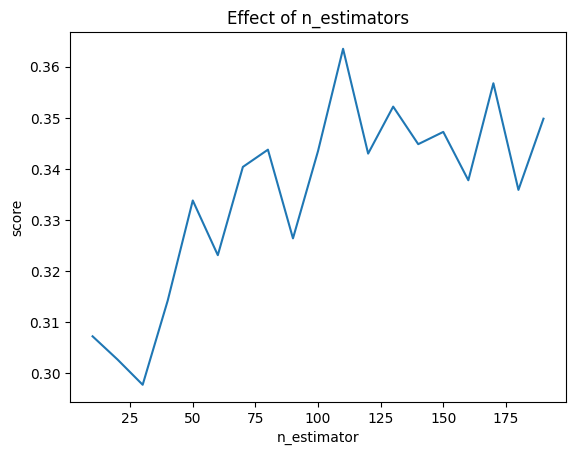

In [84]:
# Try different numbers of n_estimators 
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)